# Wissensbasierte Systeme 
## ML-Übung #1 "Nächste Nachbarn" und "Random Forest"

**Dozenten:** Dr. Sina Keller, M.sc. Felix Riese

**Datum:** 22.11.2017

**Datensatz:** EnMAP-Contest, [Download der Daten](http://www2.ipf.kit.edu/Projekte/code/EnMAP_Contest.zip) mit [Beschreibung](https://www.ipf.kit.edu/downloads/Instructions_EnMAP_Contest.pdf)

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import h5py
import matplotlib.pyplot as plt

### 1. Einlesen des Datensatzes
Der Datensatz `EnMAP_Contest_Data.mat` wurde heruntergeladen in das Verzeichnis dieses Notebooks.

In [2]:
datadict = {}
with h5py.File("EnMAP_Contest_Data.mat", 'r') as f:
    for k, v in f.items():
        datadict[k] = np.array(v)

print(datadict.keys())

dict_keys(['Im', 'cm', 'lx', 'ly', 'xi', 'yi'])


In [3]:
print("{varname:<10} | {value:<20}".format(varname="Variable", value="Shape"))
print("-"*30)
for key in datadict.keys():
    print("{varname:<10} | {value:<20}".format(varname=key, value=str(len(datadict[key]))+" x " + str(len(datadict[key][0]))))

Variable   | Shape               
------------------------------
Im         | 244 x 1000000       
cm         | 3 x 21              
lx         | 1 x 2617            
ly         | 1 x 1124            
xi         | 244 x 2617          
yi         | 244 x 1124          


### Überblick über den Datensatz
- Ein paar Zeilen anschauen mit .head(5) und .tail(5)
- Größe des Datensatzes und Anzahl möglicher Klassen herausfinden
- Datensatz geeignet visualisieren in mehreren Plots
- Karte "Im" geeignet visualisieren mit entsprechender Klasse

### Flip pixels, pixels_eval and image map

In [28]:
pixels = []
for i in range(len(datadict["xi"][0])):
    features = [row[i] for row in datadict["xi"]]
    pixels.append(features)
    
#print(pixels[0])

pixels_eval = []
for i in range(len(datadict["yi"][0])):
    features_eval = [row[i] for row in datadict["yi"]]
    pixels_eval.append(features_eval)
    
#print(pixels_eval[0])

image_pixels = []
for i in range(1000000):
    image_pixels_feature = [row[i] for row in datadict["Im"]]
    image_pixels.append(image_pixels_feature)


### Show first pixels features

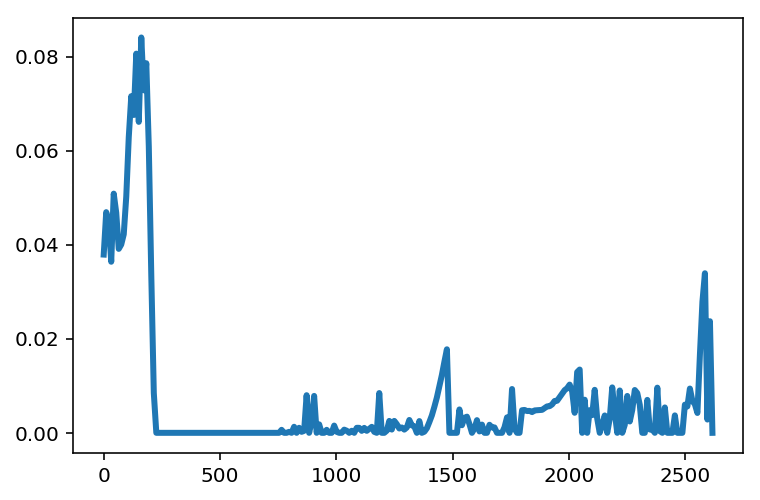

In [30]:
x = np.linspace(0, len(pixels), len(pixels[0]))
y = pixels[0]

plt.plot(x, y, linewidth=3)
plt.legend(loc="best", frameon=False)
plt.show()

### Show all pixels features in 3d plot

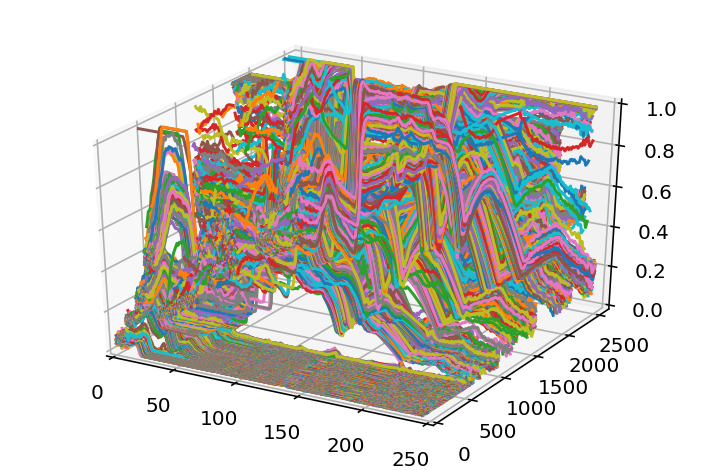

In [8]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.gca(projection='3d')

for z in range(len(pixels)):
    ax.plot(x, pixels[z], z, zdir="y")
    
ax.set_xlim(0, 250)
ax.set_ylim(0, 2600)
ax.set_zlim(0, 1)

plt.show()

### Show features of 1. class

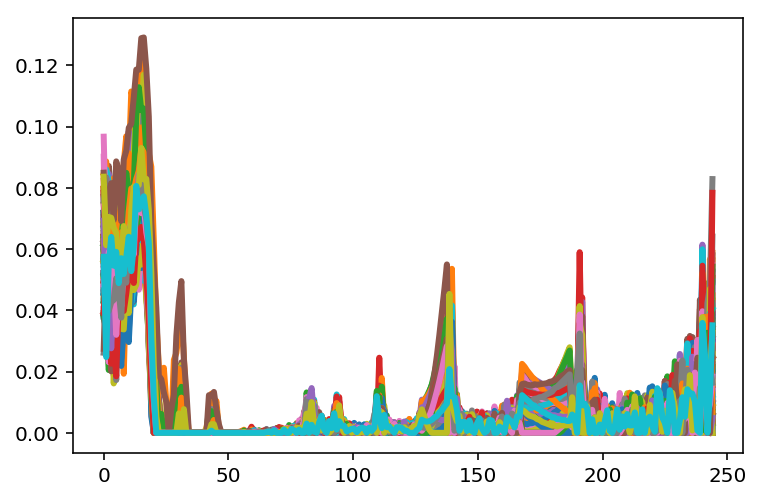

In [9]:
for index in range(len(pixels)):
    if(datadict["lx"][0][index] == 1):
        xindex = np.linspace(0, len(pixels), len(pixels[0]))
        yindex = pixels[index]

        plt.plot(xindex, yindex, linewidth=3)
        plt.legend(loc="best", frameon=False)

plt.show()

### Show Im Data as an image

<function matplotlib.pyplot.show>

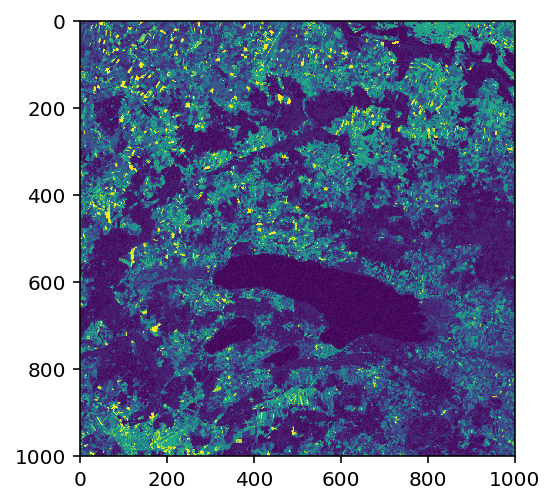

In [32]:
dataForFeature = datadict["Im"][243]
imageForFeature = dataForFeature.reshape((1000, 1000))

plt.imshow(imageForFeature)
plt.show

### Implement random forest classifier and train it with our data

In [11]:
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier(n_estimators=10, n_jobs=4, random_state=0)
model_rf.fit(pixels, datadict["lx"][0])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

### Test the classifier and print the accuracy score

In [12]:
from sklearn.metrics import accuracy_score
y_pred=model_rf.predict(pixels_eval)
print("Accuracy score =", accuracy_score(datadict["ly"][0], y_pred))

Accuracy score = 0.825622775801


### Show image with our predicted values

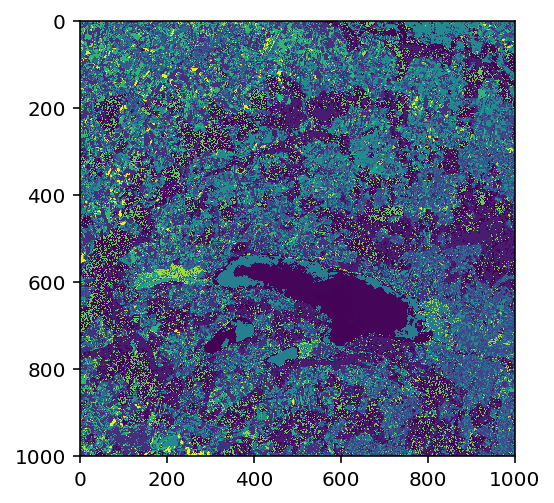

In [33]:
image_classes = model_rf.predict(image_pixels)

image_colors = []
for i in range(len(image_classes)):
    image_colors.append(datadict["cm"][0][int(image_classes[i])])

image_to_show = np.asarray(image_colors).reshape((1000, 1000))
plt.imshow(image_to_show)
plt.show()
